In [7]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt


In [14]:
 
data = pd.read_csv("populations_lapins_renards.csv", parse_dates=["date"])
lapins = data["lapin"].values
renards = data["renard"].values
dates = data["date"]

# Normalisation des données
lapins_norm = lapins / lapins.max()
renards_norm = renards / renards.max()

In [18]:
def lotka_volterra(params, t, x0, y0):
    alpha, beta, delta, gamma = params
    x, y = [x0], [y0]
    dt = t[1] - t[0]
    for _ in range(1, len(t)):
        dx = x[-1] * (alpha - beta * y[-1]) * dt
        dy = y[-1] * (delta * x[-1] - gamma) * dt
        x.append(x[-1] + dx)
        y.append(y[-1] + dy)
    return np.array(x), np.array(y)

# Définir la fonction objectif (MSE)
def objectif(params):
    x_sim, y_sim = lotka_volterra(params, np.arange(len(lapins_norm)), lapins_norm[0], renards_norm[0])
    mse_lapins = np.mean((x_sim - lapins_norm)**2)
    mse_renards = np.mean((y_sim - renards_norm)**2)
    return mse_lapins + mse_renards

# Initialisation des paramètres et bornes
params_init = [0.1, 0.02, 0.01, 0.1]  # [alpha, beta, delta, gamma]
bounds = [(0, 1), (0, 1), (0, 1), (0, 1)]

# Optimisation des paramètres
result = minimize(objectif, params_init, method="L-BFGS-B", bounds=bounds)
alpha_opt, beta_opt, delta_opt, gamma_opt = result.x

C:\Users\akram\AppData\Local\Temp\ipykernel_92396\739344076.py:6: RuntimeWarning: overflow encountered in scalar multiply
  dx = x[-1] * (alpha - beta * y[-1]) * dt
C:\Users\akram\AppData\Local\Temp\ipykernel_92396\739344076.py:7: RuntimeWarning: overflow encountered in scalar multiply
  dy = y[-1] * (delta * x[-1] - gamma) * dt
C:\Users\akram\AppData\Local\Temp\ipykernel_92396\739344076.py:15: RuntimeWarning: overflow encountered in square
  mse_lapins = np.mean((x_sim - lapins_norm)**2)
C:\Users\akram\AppData\Local\Temp\ipykernel_92396\739344076.py:16: RuntimeWarning: overflow encountered in square
  mse_renards = np.mean((y_sim - renards_norm)**2)
c:\Users\akram\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\optimize\_numdiff.py:592: RuntimeWarning: invalid value encountered in subtract
  df = fun(x1) - f0


In [19]:
t = np.arange(len(lapins))
x_sim, y_sim = lotka_volterra([alpha_opt, beta_opt, delta_opt, gamma_opt], t, lapins_norm[0], renards_norm[0])

# Dénormalisation des résultats
x_sim_deno = x_sim * lapins.max()
y_sim_deno = y_sim * renards.max()


C:\Users\akram\AppData\Local\Temp\ipykernel_92396\739344076.py:6: RuntimeWarning: overflow encountered in scalar multiply
  dx = x[-1] * (alpha - beta * y[-1]) * dt
C:\Users\akram\AppData\Local\Temp\ipykernel_92396\739344076.py:7: RuntimeWarning: overflow encountered in scalar multiply
  dy = y[-1] * (delta * x[-1] - gamma) * dt


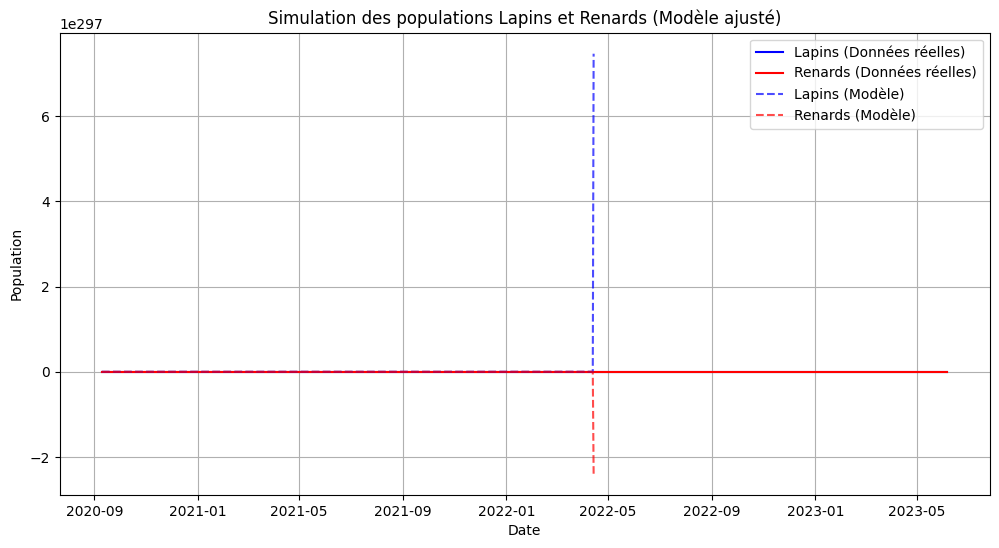

In [20]:
# Visualisation des résultats
plt.figure(figsize=(12, 6))
plt.plot(dates, lapins, label="Lapins (Données réelles)", color="blue")
plt.plot(dates, renards, label="Renards (Données réelles)", color="red")
plt.plot(dates, x_sim_deno, "--", label="Lapins (Modèle)", color="blue", alpha=0.7)
plt.plot(dates, y_sim_deno, "--", label="Renards (Modèle)", color="red", alpha=0.7)
plt.xlabel("Date")
plt.ylabel("Population")
plt.title("Simulation des populations Lapins et Renards (Modèle ajusté)")
plt.legend()
plt.grid()
plt.show()